r = 1, AUC = 0.5435


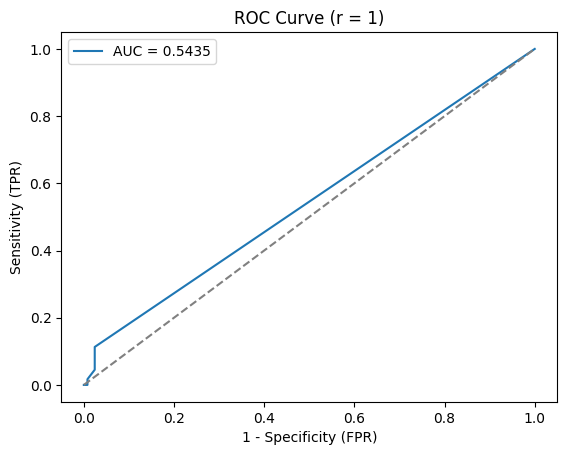

r = 2, AUC = 0.7396


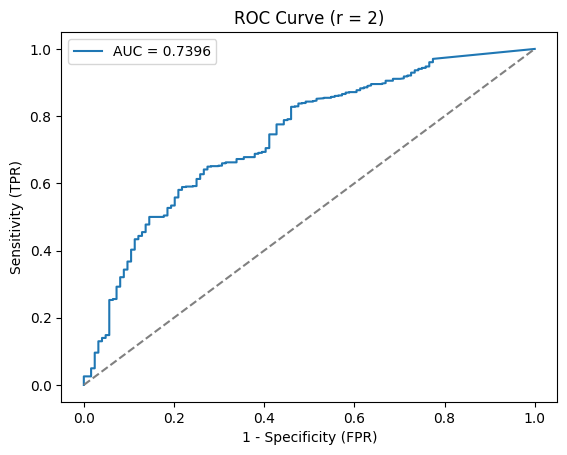

r = 3, AUC = 0.8311


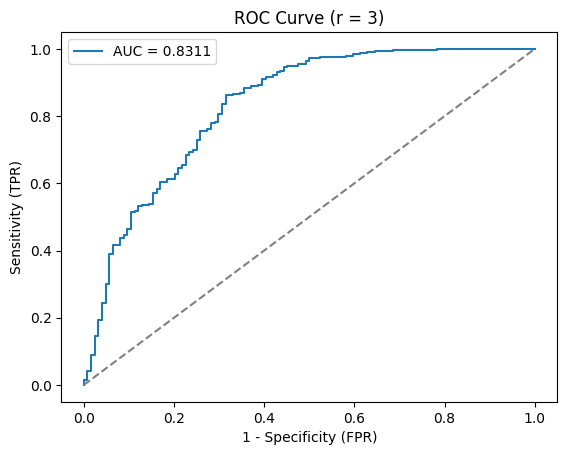

r = 4, AUC = 0.7916


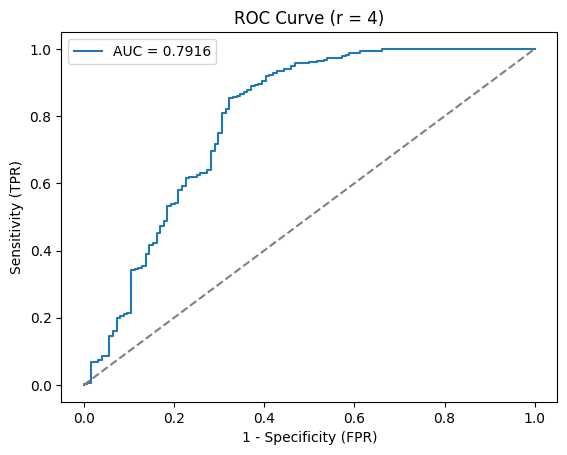

r = 5, AUC = 0.7282


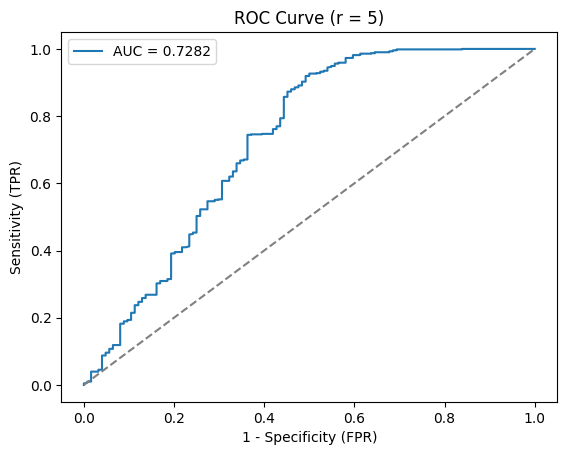

r = 6, AUC = 0.6681


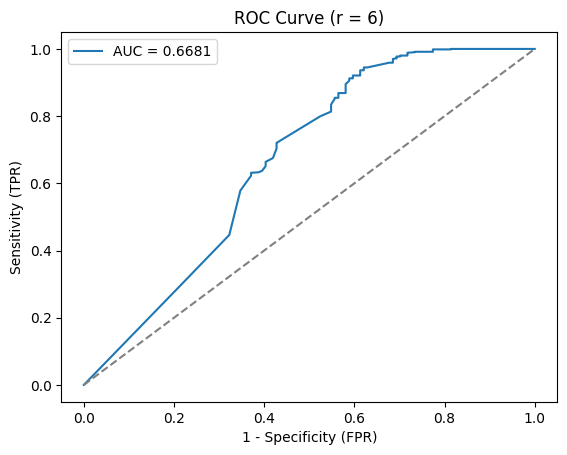

r = 7, AUC = 0.5907


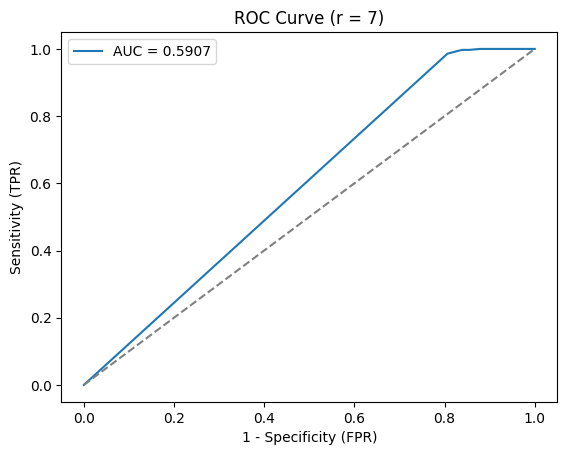

r = 8, AUC = 0.5202


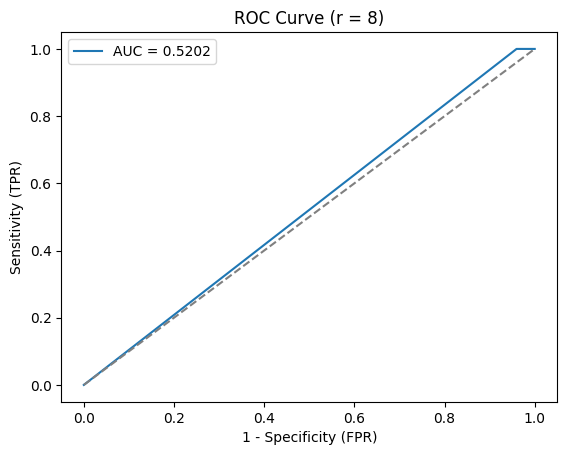

r = 9, AUC = 0.5121


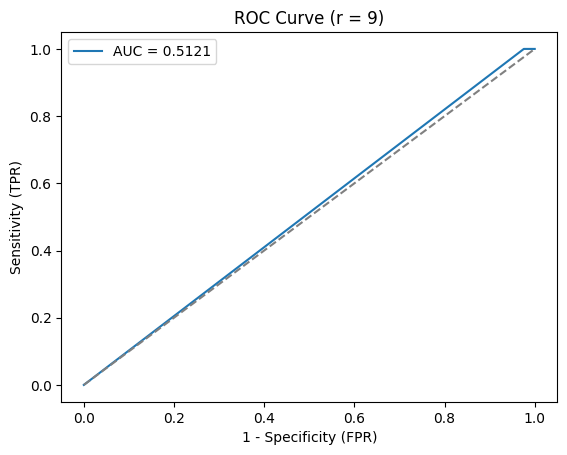

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def load_scores(file_path):
    return np.loadtxt(file_path)

for r in range(1, 10):
    english = load_scores(f"C:/Users/david/Downloads/negative-selection/negative-selection/results/english_r{r}.txt")
    tagalog = load_scores(f"C:/Users/david/Downloads/negative-selection/negative-selection/results/tagalog_r{r}.txt")
    
    scores = np.concatenate([english, tagalog])
    labels = np.concatenate([np.zeros(len(english)), np.ones(len(tagalog))])
    
    fpr, tpr, thresholds = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    
    print(f"r = {r}, AUC = {roc_auc:.4f}")
    
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel("1 - Specificity (FPR)")
    plt.ylabel("Sensitivity (TPR)")
    plt.title(f"ROC Curve (r = {r})")
    plt.legend()
    plt.show()   # <- this displays the plot and waits until you close it